#Persiapan Data sebelum melakukan Analisis

##Kasus(Relationship per tabel)
1. Industri mana yang memberikan gaji paling besar/kecil
2. Bagaimana pengaruh pengalaman kerja terhadap gaji: pengalaman kerja di bidang dengan gaji, dan pengalama kerja dengan gaji
3. Bagaimana pengaruh jenis kelamin terhadap gaji
4. Bagaimana pengaruh tingkat pendidikan terhadap gaji

##Data Preparation
Menyiapkan dataset

##Data Discovery & Profiling
1. Keterangan
- Semua data yang kita modusin jika mising value dibawah 1% dari total keseluruhan data
- Mengidentifikasi pola, hubungan, dan atribut lain dalam data, serta ketidakkonsistenan, anomali, nilai yang hilang, dan masalah lain sehingga dapat diatasi.

2. Kolom Industry 
- Problem: ada yang tidak isi.
- Solusi: kita isi field yang kosong dengan sesuaikan pakai modus kolom job title

3. Kolom Currency
- Kasus 1: 
  - Problem: ada pengguna yang mengisi di kolom currency dan juga di other currency, jadinya bisa saja pengguna tersebut currencynya misal "USD" tapi diisi juga di other currency. 
  - Solusi: Jadinya kita cek yang di currency yang memilih "other" dan ngisi di other currency. Yang ngisinya selain "other" di currency berarti di kolom other currency gak dipakai

4. Kolom Education
- Kasus 4: 
  - Problem: data kolom education ada yang memang tidak mengisi education, atau memang dia tidak punya education. 
  - Solusi: kita ubah field nya pakai nilai modus.

5. Kolom Gender
- Kasus 3: 
  - Problem: ada field kosong
  - Solusi: kolom gender untuk menangani field kosong kita pakai cara modus



## Data Cleansing & Formatting
Kesalahan dan masalah data yang teridentifikasi diperbaiki untuk membuat kumpulan data yang lengkap dan akurat. Misalnya, sebagai bagian dari kumpulan data cleansing, data yang salah dihapus atau diperbaiki, nilai yang hilang diisi dan entri yang tidak konsisten diselaraskan.
1. Imputasi data per kolom dalam dataset Salary menggunakan nilai modus
2. Format data pada dataset ini kami lakukan pada penyesesuaian currency yang berbeda dengan menyamakan semua currency ke USD. Sehingga kami menambahkan kolom baru bernama usd_salary yang merupakan hasil konversi annual_salary ke currency USD.

## Analysis the data


## Visualization

#Import Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Membaca Data

In [65]:
df = pd.read_excel (r'salary_survey.xlsx')
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


#Mengecek dan Mengisi Data Kosong

##Mengecek Data Kosong

In [66]:
print(df.isnull().sum())

Timestamp                           0
age                                 0
industry                           72
job_title                           0
job_title_additional_context    20713
salary                              0
additional_salary                7256
currency                            0
other_currency                  27749
income_additional_context       24912
country                             0
us_country                       4982
city                               75
work_experience_overall             0
work_experience_professional        0
education                         214
gender                            167
race                              169
dtype: int64


##Mengisi Missing Value

### Missing Value Kolom Industry & Imputasi Modus
Pada kolom Industry terdapat 72 field kosong. Untuk mengatasi hal tersebut, kami mengambil nilai modus di kolom industry untuk setiap nilai job_title yang terisi. Kemudian, akan mengisi missing value di kolom industry dengan nilai modus yang sesuai dengan job_title 

In [67]:
# Membuat DataFrame baru hanya dengan data yang memiliki missing value di kolom industry
missing_industry_df = df[df['industry'].isnull()]

# Filter data yang memiliki nilai di kolom job_title
missing_industry_with_jobtitle_df = missing_industry_df[missing_industry_df['job_title'].notna()]

# Tampilkan data yang memiliki missing value di kolom industry dan nilai di bagian kolom job_title
missing_industry_with_jobtitle_df

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race
360,2021-04-27 11:08:41.197,45-54,NaN,Proposal Manager,NaN,87938,4000.0,USD,NaN,NaN,US,North Carolina,Wilmington,21 - 30 years,11 - 20 years,College degree,Woman,White
645,2021-04-27 11:12:58.989,35-44,NaN,Legal editor,NaN,82000,8200.0,USD,NaN,NaN,USA,New York,Rochester,11 - 20 years,11 - 20 years,Master's degree,Woman,White
1604,2021-04-27 11:28:19.790,25-34,NaN,Commissioning Editor,NaN,36000,NaN,GBP,NaN,NaN,UK,NaN,London,11 - 20 years,8 - 10 years,Master's degree,Woman,"Asian or Asian American, White"
2055,2021-04-27 11:37:01.190,35-44,NaN,Research Manager,NaN,115000,NaN,USD,NaN,NaN,US,District of Columbia,DC,21 - 30 years,11 - 20 years,Master's degree,Woman,White
2063,2021-04-27 11:37:11.960,35-44,NaN,office manager,manage a building vs managing employees,40000,NaN,USD,NaN,NaN,USA,Nevada,Las Vegas,11 - 20 years,11 - 20 years,High School,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27250,2021-10-26 13:46:24.184,55-64,NaN,Technician Automation,NaN,35000,0.0,EUR,NaN,NaN,Ireland,NaN,Donegal,31 - 40 years,31 - 40 years,Master's degree,Man,White
27592,2021-12-28 18:15:36.647,45-54,NaN,Associate professor,Tenured,80000,0.0,USD,NaN,"Humanities, regional state college",USA,New Hampshire,Keene,11 - 20 years,11 - 20 years,PhD,Woman,White
27730,2022-03-27 10:59:32.710,18-24,NaN,chief executive official,NaN,50,NaN,ZAR,NaN,NaN,spain,NaN,castellon,8 - 10 years,11 - 20 years,NaN,NaN,NaN
27853,2022-08-04 18:33:50.141,18-24,NaN,Archivist,NaN,50000,NaN,USD,NaN,NaN,United States,Wisconsin,Madison,2 - 4 years,2 - 4 years,Master's degree,Man,White


In [69]:
# Cek nilai unik di kolom job_title ketika industry NA
unique_job_titles = missing_industry_df['job_title'].unique()
unique_job_titles

array(['Proposal Manager', 'Legal editor', 'Commissioning Editor ',
       'Research Manager', 'office manager', 'Research Analyst',
       'Senior Regulatory Affairs Specialist', 'Adult Services Librarian',
       'Program Manager ', 'GIS Analyst', 'Director of Compliance', 'EA',
       'Research Scientist', 'Youth Services Librarian',
       'Financial Analyst (part-qualified)', 'Executive Assistant II',
       'Office Supervisor ', 'Chief of Staff, Customer Experience',
       'Veterinarian ', 'Lab Assistant (Level II)',
       'Customer Service Supervisor', 'Customer Service analyst ',
       'Manager, strategy', 'People Operations Manager ',
       'VP of Finance & Operations', 'Office manager ', 'UX Designer',
       'Senior Manager of Ops Strategy', 'Credit Supervisor ',
       'Operations Manager', 'hr manager', 'Director of HR',
       'Accounting manager', 'HR Generalist II',
       'Campaign and Program Manager ', 'Director',
       'Marketing Coordinator', 'Vendor Manager',

In [70]:
# Mencari nilai modus di kolom industry untuk job_title unique
pm_industry_mode = df[df['job_title'] == 'Proposal Manager']['industry'].mode().iloc[0]
le_industry_mode = df[df['job_title'] == 'Legal Editor']['industry'].mode().iloc[0]
ce_industry_mode = df[df['job_title'] == 'Editor']['industry'].mode().iloc[0]
rm_industry_mode = df[df['job_title'] == 'Research Manager']['industry'].mode().iloc[0]
om_industry_mode = df[df['job_title'] == 'office manager']['industry'].mode().iloc[0]
ra_industry_mode = df[df['job_title'] == 'Research Analyst']['industry'].mode().iloc[0]
sras_industry_mode = df[df['job_title'] == 'Senior Regulatory Affairs Specialist']['industry'].mode().iloc[0]
asl_industry_mode = df[df['job_title'] == 'Adult Services Librarian']['industry'].mode().iloc[0]
prom_industry_mode = df[df['job_title'] == 'Program Manager']['industry'].mode().iloc[0]
ga_industry_mode = df[df['job_title'] == 'GIS Analyst']['industry'].mode().iloc[0]
doc_industry_mode = df[df['job_title'] == 'Director of Compliance']['industry'].mode().iloc[0]
ea_industry_mode = df[df['job_title'] == 'EA']['industry'].mode().iloc[0]
rs_industry_mode = df[df['job_title'] == 'Research Scientist']['industry'].mode().iloc[0]
ysl_industry_mode = df[df['job_title'] == 'Youth Services Librarian']['industry'].mode().iloc[0]
fa_industry_mode = df[df['job_title'] == 'Financial Analyst']['industry'].mode().iloc[0]
eai_industry_mode = df[df['job_title'] == 'Executive Assistant']['industry'].mode().iloc[0]
os_industry_mode = df[df['job_title'] == 'Office Supervisor']['industry'].mode().iloc[0]
cos_industry_mode = df[df['job_title'] == 'Chief of Staff']['industry'].mode().iloc[0]
vet_industry_mode = df[df['job_title'] == 'Veterinarian']['industry'].mode().iloc[0]
la_industry_mode = df[df['job_title'] == 'Lab Assistant']['industry'].mode().iloc[0]
css_industry_mode = df[df['job_title'] == 'Customer Service Supervisor']['industry'].mode().iloc[0]
csa_industry_mode = df[df['job_title'] == 'Customer Service']['industry'].mode().iloc[0]
ms_industry_mode = df[df['job_title'] == 'Manager']['industry'].mode().iloc[0]
pom_industry_mode = df[df['job_title'] == 'People Operations Manager']['industry'].mode().iloc[0]
fo_industry_mode = df[df['job_title'] == 'Director of Finance & Operations']['industry'].mode().iloc[0]
uxd_industry_mode = df[df['job_title'] == 'UX Designer']['industry'].mode().iloc[0]
sm_industry_mode = df[df['job_title'] == 'Senior Manager']['industry'].mode().iloc[0]
cre_industry_mode = df[df['job_title'] == 'Credit and collections supervisor ']['industry'].mode().iloc[0]
osm_industry_mode = df[df['job_title'] == 'Operations Manager']['industry'].mode().iloc[0]
hrm_industry_mode = df[df['job_title'] == 'HR Manager']['industry'].mode().iloc[0]
dhr_industry_mode = df[df['job_title'] == 'Director of HR']['industry'].mode().iloc[0]
am_industry_mode = df[df['job_title'] == 'Accounting Manager']['industry'].mode().iloc[0]
hrg_industry_mode = df[df['job_title'] == 'HR Generalist II']['industry'].mode().iloc[0]
cm_industry_mode = df[df['job_title'] == 'Campaign Manager']['industry'].mode().iloc[0]
dir_industry_mode = df[df['job_title'] == 'Director']['industry'].mode().iloc[0]
mcor_industry_mode = df[df['job_title'] == 'Marketing Coordinator']['industry'].mode().iloc[0]
vem_industry_mode = df[df['job_title'] == ' Vendor Manager']['industry'].mode().iloc[0]
trans_industry_mode = df[df['job_title'] == 'Translator']['industry'].mode().iloc[0]
ba_industry_mode = df[df['job_title'] == 'Business Analyst']['industry'].mode().iloc[0]
aa_industry_mode = df[df['job_title'] == 'Administrative Assistant']['industry'].mode().iloc[0]
ts_industry_mode = df[df['job_title'] == 'Technical specialist']['industry'].mode().iloc[0]
manag_industry_mode = df[df['job_title'] == 'Management Analyst']['industry'].mode().iloc[0]
auto_industry_mode = df[df['job_title'] == 'Auto Liability Claims Adjuster']['industry'].mode().iloc[0]
is_industry_mode = df[df['job_title'] == 'Inventory Specialist']['industry'].mode().iloc[0]
seng_industry_mode = df[df['job_title'] == 'Software Engineer']['industry'].mode().iloc[0]
docs_industry_mode = df[df['job_title'] == 'Director of Customer Service ']['industry'].mode().iloc[0]
qam_industry_mode = df[df['job_title'] == 'QA manager']['industry'].mode().iloc[0]
amd_industry_mode = df[df['job_title'] == 'Account Management Director']['industry'].mode().iloc[0]
bio_industry_mode = df[df['job_title'] == 'Biologist']['industry'].mode().iloc[0]
che_industry_mode = df[df['job_title'] == 'Chemist']['industry'].mode().iloc[0]
dsm_industry_mode = df[df['job_title'] == 'Digital Strategy Manager']['industry'].mode().iloc[0]
ect_industry_mode = df[df['job_title'] == 'Early childhood teacher']['industry'].mode().iloc[0]
svp_industry_mode = df[df['job_title'] == 'SVP']['industry'].mode().iloc[0]
sp_industry_mode = df[df['job_title'] == 'Supply planner ']['industry'].mode().iloc[0]
dms_industry_mode = df[df['job_title'] == 'Digital Marketing Specialist']['industry'].mode().iloc[0]
itm_industry_mode = df[df['job_title'] == 'IT Manager']['industry'].mode().iloc[0]
arch_industry_mode = df[df['job_title'] == 'Archivist']['industry'].mode().iloc[0]
dan_industry_mode = df[df['job_title'] == 'Analyst']['industry'].mode().iloc[0]
cad_industry_mode = df[df['job_title'] == 'Contract Administrator']['industry'].mode().iloc[0]
inst_industry_mode = df[df['job_title'] == 'Instructor']['industry'].mode().iloc[0]
ap_industry_mode = df[df['job_title'] == 'Associate Professor']['industry'].mode().iloc[0]
ceo_industry_mode = df[df['job_title'] == 'CEO']['industry'].mode().iloc[0]
sitc_industry_mode = df[df['job_title'] == 'Senior IT Consultant']['industry'].mode().iloc[0]
res_industry_mode = df[df['job_title'] == 'Research Scientist']['industry'].mode().iloc[0]
offs_industry_mode = df[df['job_title'] == 'Office Supervisor']['industry'].mode().iloc[0]
veter_industry_mode = df[df['job_title'] == 'Veterinarian']['industry'].mode().iloc[0]
techs_industry_mode = df[df['job_title'] == 'Technical Specialist']['industry'].mode().iloc[0]


# Mengisi missing value di kolom industry dengan nilai modus yang sesuai
df.loc[(df['job_title'] == 'Proposal Manager') & (df['industry'].isnull()), 'industry'] = pm_industry_mode
df.loc[(df['job_title'] == 'Legal Editor') & (df['industry'].isnull()), 'industry'] = le_industry_mode
df.loc[(df['job_title'] == 'Commissioning Editor') & (df['industry'].isnull()), 'industry'] = ce_industry_mode
df.loc[(df['job_title'] == 'Research Manager') & (df['industry'].isnull()), 'industry'] = rm_industry_mode
df.loc[(df['job_title'] == 'office manager') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'Research Analyst') & (df['industry'].isnull()), 'industry'] = ra_industry_mode
df.loc[(df['job_title'] == 'Senior Regulatory Affairs Specialist') & (df['industry'].isnull()), 'industry'] = sras_industry_mode
df.loc[(df['job_title'] == 'Adult Services Librarian') & (df['industry'].isnull()), 'industry'] = asl_industry_mode
df.loc[(df['job_title'] == 'Program Manager ') & (df['industry'].isnull()), 'industry'] = prom_industry_mode
df.loc[(df['job_title'] == 'GIS Analyst') & (df['industry'].isnull()), 'industry'] = ga_industry_mode
df.loc[(df['job_title'] == 'Director of Compliance') & (df['industry'].isnull()), 'industry'] = doc_industry_mode
df.loc[(df['job_title'] == 'EA') & (df['industry'].isnull()), 'industry'] = ea_industry_mode
df.loc[(df['job_title'] == 'Youth Services Librarian') & (df['industry'].isnull()), 'industry'] = ysl_industry_mode
df.loc[(df['job_title'] == 'Financial Analyst (part-qualified)') & (df['industry'].isnull()), 'industry'] = fa_industry_mode
df.loc[(df['job_title'] == 'Executive Assistant II') & (df['industry'].isnull()), 'industry'] = eai_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor') & (df['industry'].isnull()), 'industry'] = os_industry_mode
df.loc[(df['job_title'] == 'Chief of Staff, Customer Experience') & (df['industry'].isnull()), 'industry'] = cos_industry_mode
df.loc[(df['job_title'] == 'Veterinarian') & (df['industry'].isnull()), 'industry'] = vet_industry_mode
df.loc[(df['job_title'] == 'Lab Assistant (Level II)') & (df['industry'].isnull()), 'industry'] = la_industry_mode
df.loc[(df['job_title'] == 'Customer Service Supervisor') & (df['industry'].isnull()), 'industry'] = css_industry_mode
df.loc[(df['job_title'] == 'Customer Service analyst') & (df['industry'].isnull()), 'industry'] = csa_industry_mode
df.loc[(df['job_title'] == 'Manager, strategy') & (df['industry'].isnull()), 'industry'] = ms_industry_mode
df.loc[(df['job_title'] == 'People Operations Manager') & (df['industry'].isnull()), 'industry'] = pom_industry_mode
df.loc[(df['job_title'] == 'VP of Finance & Operations') & (df['industry'].isnull()), 'industry'] = fo_industry_mode
df.loc[(df['job_title'] == 'Office manager') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'UX Designer') & (df['industry'].isnull()), 'industry'] = uxd_industry_mode
df.loc[(df['job_title'] == 'Senior Manager of Ops Strategy') & (df['industry'].isnull()), 'industry'] = sm_industry_mode
df.loc[(df['job_title'] == 'Credit Supervisor') & (df['industry'].isnull()), 'industry'] = cre_industry_mode
df.loc[(df['job_title'] == 'Operations Manager') & (df['industry'].isnull()), 'industry'] = osm_industry_mode
df.loc[(df['job_title'] == 'hr manager') & (df['industry'].isnull()), 'industry'] = hrm_industry_mode
df.loc[(df['job_title'] == 'Director of HR') & (df['industry'].isnull()), 'industry'] = dhr_industry_mode
df.loc[(df['job_title'] == 'Accounting manager') & (df['industry'].isnull()), 'industry'] = am_industry_mode
df.loc[(df['job_title'] == 'HR Generalist II') & (df['industry'].isnull()), 'industry'] = hrg_industry_mode
df.loc[(df['job_title'] == 'Campaign and Program Manager') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Director') & (df['industry'].isnull()), 'industry'] = dir_industry_mode
df.loc[(df['job_title'] == 'Marketing Coordinator') & (df['industry'].isnull()), 'industry'] = mcor_industry_mode
df.loc[(df['job_title'] == 'Vendor Manager') & (df['industry'].isnull()), 'industry'] = vem_industry_mode
df.loc[(df['job_title'] == 'Real Estate Services Assistant') & (df['industry'].isnull()), 'industry'] = 'Real estate services'
df.loc[(df['job_title'] == 'Translator') & (df['industry'].isnull()), 'industry'] = trans_industry_mode
df.loc[(df['job_title'] == 'Business Analyst') & (df['industry'].isnull()), 'industry'] = ba_industry_mode
df.loc[(df['job_title'] == 'Administrative Assistant') & (df['industry'].isnull()), 'industry'] = aa_industry_mode
df.loc[(df['job_title'] == 'Technical specialist') & (df['industry'].isnull()), 'industry'] = ts_industry_mode
df.loc[(df['job_title'] == 'Order Management Analyst') & (df['industry'].isnull()), 'industry'] = manag_industry_mode
df.loc[(df['job_title'] == 'Auto liability representative 2') & (df['industry'].isnull()), 'industry'] = auto_industry_mode
df.loc[(df['job_title'] == 'Inventory Specialist') & (df['industry'].isnull()), 'industry'] = is_industry_mode
df.loc[(df['job_title'] == 'Software engineer') & (df['industry'].isnull()), 'industry'] = seng_industry_mode
df.loc[(df['job_title'] == 'Government Statistician') & (df['industry'].isnull()), 'industry'] = 'Government'
df.loc[(df['job_title'] == 'Associate Director of Customer Service') & (df['industry'].isnull()), 'industry'] = docs_industry_mode
df.loc[(df['job_title'] == 'QA manager') & (df['industry'].isnull()), 'industry'] = qam_industry_mode
df.loc[(df['job_title'] == 'Account management0') & (df['industry'].isnull()), 'industry'] = amd_industry_mode
df.loc[(df['job_title'] == 'Biologist 1') & (df['industry'].isnull()), 'industry'] = bio_industry_mode
df.loc[(df['job_title'] == 'Chemist') & (df['industry'].isnull()), 'industry'] = che_industry_mode
df.loc[(df['job_title'] == 'Cybersecurity senior risk specialist') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Digital strategy manager') & (df['industry'].isnull()), 'industry'] = dsm_industry_mode
df.loc[(df['job_title'] == 'Early childhood teacher') & (df['industry'].isnull()), 'industry'] = ect_industry_mode
df.loc[(df['job_title'] == 'Svp') & (df['industry'].isnull()), 'industry'] = svp_industry_mode
df.loc[(df['job_title'] == 'supply Planner') & (df['industry'].isnull()), 'industry'] = sp_industry_mode
df.loc[(df['job_title'] == 'Digital Marketing Specialist') & (df['industry'].isnull()), 'industry'] = dms_industry_mode
df.loc[(df['job_title'] == 'People Operations Manager ') & (df['industry'].isnull()), 'industry'] = pom_industry_mode
df.loc[(df['job_title'] == 'Archivist') & (df['industry'].isnull()), 'industry'] = arch_industry_mode
df.loc[(df['job_title'] == 'Data Analytics Engineer') & (df['industry'].isnull()), 'industry'] = dan_industry_mode
df.loc[(df['job_title'] == 'Contract Administrator') & (df['industry'].isnull()), 'industry'] = cad_industry_mode
df.loc[(df['job_title'] == 'Instructor/Operator') & (df['industry'].isnull()), 'industry'] = inst_industry_mode
df.loc[(df['job_title'] == 'Technician Automation ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Associate professor') & (df['industry'].isnull()), 'industry'] = ap_industry_mode
df.loc[(df['job_title'] == 'chief executive official') & (df['industry'].isnull()), 'industry'] = ceo_industry_mode
df.loc[(df['job_title'] == 'Senior IT Consultant') & (df['industry'].isnull()), 'industry'] = sitc_industry_mode
df.loc[(df['job_title'] == 'Legal editor') & (df['industry'].isnull()), 'industry'] = le_industry_mode
df.loc[(df['job_title'] == 'Research Scientist') & (df['industry'].isnull()), 'industry'] = res_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor') & (df['industry'].isnull()), 'industry'] = offs_industry_mode
df.loc[(df['job_title'] == 'Veterinarian ') & (df['industry'].isnull()), 'industry'] = veter_industry_mode
df.loc[(df['job_title'] == 'Technical specialist') & (df['industry'].isnull()), 'industry'] = techs_industry_mode
df.loc[(df['job_title'] == 'IT Manager') & (df['industry'].isnull()), 'industry'] = itm_industry_mode
df.loc[(df['job_title'] == 'Office manager ') & (df['industry'].isnull()), 'industry'] = om_industry_mode
df.loc[(df['job_title'] == 'Commissioning Editor ') & (df['industry'].isnull()), 'industry'] = ce_industry_mode
df.loc[(df['job_title'] == 'Office Supervisor ') & (df['industry'].isnull()), 'industry'] = offs_industry_mode
df.loc[(df['job_title'] == 'Customer Service analyst ') & (df['industry'].isnull()), 'industry'] = csa_industry_mode
df.loc[(df['job_title'] == 'Credit Supervisor ') & (df['industry'].isnull()), 'industry'] = cre_industry_mode
df.loc[(df['job_title'] == 'Campaign and Program Manager ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Technical specialist ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'
df.loc[(df['job_title'] == 'Order Management Analyst ') & (df['industry'].isnull()), 'industry'] = manag_industry_mode
df.loc[(df['job_title'] == 'Software engineer ') & (df['industry'].isnull()), 'industry'] = seng_industry_mode
df.loc[(df['job_title'] == 'Cybersecurity senior risk specialist ') & (df['industry'].isnull()), 'industry'] = 'Computing or Tech'

In [110]:
industry_missing = df['industry'].isnull().sum()
print('Jumlah missing value di kolom industry:', industry_missing)

Jumlah missing value di kolom industry: 0


###Missing Value Kolom Gender & Education dengan Imputasi Modus
Data kosong yang bersifat kategorikal dan tidak dapat dihitung seperti data numerik, dapat diisi dengan modus. Modus akan memberikan nilai yang paling sering muncul dan sesuai dengan jenis data. Pada kolom education terdapat 214 field kosong dan kolom gender terdapat 167 field kosong.

In [72]:
mode_gender = df['gender'].mode()[0]
df['gender'].fillna(mode_gender, inplace=True)

mode_education = df['education'].mode()[0]
df['education'].fillna(mode_education, inplace=True)

Kode di atas merupakan pengisian missing value dengan modus untuk kolom gender dan education

In [73]:
missing_gender = df['gender'].isnull().sum()
print('Jumlah missing value di kolom gender:', missing_gender)

missing_education = df['education'].isnull().sum()
print('Jumlah missing value di kolom education:', missing_education)

Jumlah missing value di kolom gender: 0
Jumlah missing value di kolom education: 0


Setelah diisi missing valuenya dengan modus, kolom gender dan education sudah tidak memiliki value kosong lagi.

##Mengubah Currency Rate

###Melihat data currency

In [74]:
# Menampilkan kolom data
print(df.salary)
print(df.currency)
print(df.other_currency)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27946, dtype: int64
0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: currency, Length: 27946, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
27941    NaN
27942    NaN
27943    NaN
27944    NaN
27945    NaN
Name: other_currency, Length: 27946, dtype: object


In [75]:
print(df.loc[434, 'currency'])

Other


Dapat dilihat bahwa data dengan **index 434** memiliki data currency **'Other'**. Maka dari itu, data currencynya perlu diambil dari kolom **other_currency**.

###Menggabungkan kolom curreny dengan other_curreny

In [76]:
df['new_currency'] = df['currency']
df['new_currency'] = df['new_currency'].where(df['new_currency'] != 'Other', df['other_currency'])
print(df['new_currency'])

0        USD
1        GBP
2        USD
3        USD
4        USD
        ... 
27941    USD
27942    USD
27943    USD
27944    USD
27945    USD
Name: new_currency, Length: 27946, dtype: object


**Penjelasan Kode**

Nilai pada kolom **new_currency** yang bernilai **'Other'** akan **diganti** dengan nilai dari kolom **other_currency**. Jika nilai tidak bernilai other, maka data di new_currency akan tetap **sama**.

In [77]:
print(df.loc[434, 'new_currency'])

INR


Setelah kolom currency dan other_currency digabung, dapat dilihat data dengan index 434 adalah INR

###Melihat jenis currency

In [78]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'INR' 'Peso Argentino' 'CHF' 'MYR'
 'ZAR' 'SEK' 'HKD' 'NOK' 'BR$' 'Dkk' 'TTD' 'Indian rupees' 'BRL (R$)'
 'Mexican pesos' 'CZK' 'DKK' 'Bdt' 'American Dollars' 'Php'
 'PLN (Polish zloty)' 'czech crowns' 'TRY' 'Norwegian kroner (NOK)' 'CNY'
 'ILS/NIS' nan 'US Dollar' 'BRL' 'NIS (new Israeli shekel)'
 'RMB (chinese yuan)' 'AUD' 'JPY' 'Taiwanese dollars' 'Philippine Peso'
 'SGD' 'KRW (Korean Won)' 'Czk' 'THB' 'IDR ' 'Sgd' 'Nok' 'NZD'
 'ILS (Shekel)' 'DKK ' 'China RMB' 'AUD Australian ' 'LKR' 'Polish Złoty'
 'Philippine peso (PHP)' 'Australian Dollars ' 'PHP' 'Equity' 'ARS'
 'Argentinian peso (ARS)' 'Israeli Shekels' 'ILS' 'MXN'
 'PhP (Philippine Peso)' 'PLN' 'KRW' 'SAR' 'RM' 'IDR' 'Argentine Peso'
 'Philippine Pesos' 'Ils' 'INR (Indian Rupee)' 'NTD' 'Danish Kroner'
 'Korean Won ' 'dkk' 'Euro' 'SGD ' 'Mexican Pesos' 'THAI  BAHT'
 'Thai Baht ' 'croatian kuna' 'PLN (Zwoty)' 'Rupees' 'Singapore Dollara'
 'NGN' 'COP']
USD                23296
CAD              

Dapat dilihat bahwa data currency pada kolom new_currency masih kotor dan masih banyak duplikasi. Maka dari itu, data tersebut perlu dibersihkan dan diseragamkan.

In [79]:
is_nan = df['new_currency'].isna().sum()
print(is_nan)

equity_count = df['new_currency'].value_counts()['Equity']
print("Jumlah nilai 'equity':", equity_count)

4
Jumlah nilai 'equity': 1


Terdapat pula data bernilai nan dan equity (saham). Data tersebut harus dihapus. 

###Cleaning Currency

Mengubah dan menyeragamkan currency

In [80]:
df['new_currency'] = df['new_currency'].str.upper().replace(['AUD/NZD', 'NZD', 'AUD Australian ', 'Australian Dollars ', 'AUSTRALIAN DOLLARS ', 'AUD AUSTRALIAN', 'AUD AUSTRALIAN '], 'AUD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Peso Argentino', 'Argentinian peso (ARS)', 'Argentine Peso', 'ARGENTINIAN PESO (ARS)', 'ARGENTINE PESO', 'PESO ARGENTINO'], 'ARS')
df['new_currency'] = df['new_currency'].str.upper().replace(['BR$', 'BRL (R$)'], 'BRL')
df['new_currency'] = df['new_currency'].str.upper().replace(['Dkk', 'DKK ', 'Danish Kroner', 'dkk', 'DANISH KRONER'], 'DKK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Indian rupees', 'INR (Indian Rupee)', 'Rupees', 'INDIAN RUPEES', 'INR (INDIAN RUPEE)', 'RUPEES'], 'INR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Mexican pesos', 'Mexican Pesos', 'MEXICAN PESOS'], 'MXN')
df['new_currency'] = df['new_currency'].str.replace('Bdt', 'BDT')
df['new_currency'] = df['new_currency'].str.upper().replace(['American Dollars', 'US Dollar', 'AMERICAN DOLLARS', 'US DOLLAR'], 'USD')
df['new_currency'] = df['new_currency'].str.upper().replace(['Php', 'Philippine Peso', 'Philippine peso (PHP)', 'PhP (Philippine Peso)', 'Philippine Pesos', 'PHILIPPINE PESO', 'PHP (PHILIPPINE PESO)', 'PHILIPPINE PESOS', 'PHILIPPINE PESO (PHP)'], 'PHP')
df['new_currency'] = df['new_currency'].str.upper().replace(['PLN (Polish zloty)', 'Polish Złoty', 'PLN (Zwoty)', 'PLN (POLISH ZLOTY)', 'PLN (ZWOTY)', 'POLISH ZŁOTY'], 'PLN')
df['new_currency'] = df['new_currency'].str.upper().replace(['czech crowns', 'Czk', 'CZECH CROWNS'], 'CZK')
df['new_currency'] = df['new_currency'].str.upper().replace(['Norwegian kroner (NOK)', 'Nok', 'NORWEGIAN KRONER (NOK)'], 'NOK')
df['new_currency'] = df['new_currency'].str.upper().replace(['ILS/NIS', 'NIS (new Israeli shekel)', 'ILS (Shekel)', 'Israeli Shekels', 'Ils', 'NIS (NEW ISRAELI SHEKEL)', 'ISRAELI SHEKELS', 'ILS (SHEKEL)'], 'NIS')
df['new_currency'] = df['new_currency'].str.upper().replace(['RMB (chinese yuan)', 'RMB (CHINESE YUAN)'], 'RMB')
df['new_currency'] = df['new_currency'].str.upper().replace(['Taiwanese dollars', 'TAIWANESE DOLLARS'], 'TWD')
df['new_currency'] = df['new_currency'].str.upper().replace(['KRW (Korean Won)', 'Korean Won ', 'KOREAN WON ', 'KRW (KOREAN WON)'], 'KRW')
df['new_currency'] = df['new_currency'].str.replace('IDR ', 'IDR')
df['new_currency'] = df['new_currency'].str.upper().replace(['Sgd', 'SGD ', 'Singapore Dollara', 'SINGAPORE DOLLARA'], 'SGD')
df['new_currency'] = df['new_currency'].str.upper().replace(['China RMB', 'CHINA RMB'], 'CNY')
df['new_currency'] = df['new_currency'].str.upper().replace(['Euro', 'EURO'], 'EUR')
df['new_currency'] = df['new_currency'].str.upper().replace(['THAI  BAHT', 'Thai Baht ', 'THAI BAHT '], 'THB')
df['new_currency'] = df['new_currency'].str.upper().replace(['croatian kuna', 'CROATIAN KUNA'], 'THB')

Menghapus nilai NaN dan equity

In [81]:
# Menemukan letak nilai NaN dan Equity pada kolom 'new_currency'
nan_index = df[df['new_currency'].isna()].index
equity_index = df.loc[df['new_currency'] == 'Equity'].index

# Cetak indeks
print("Letak nilai Nan pada indeks : ", nan_index)
print("Letak nilai equity pada indeks : ", equity_index)

Letak nilai Nan pada indeks :  Int64Index([9344, 18843, 18882, 18904], dtype='int64')
Letak nilai equity pada indeks :  Int64Index([], dtype='int64')


In [82]:
df = df.drop([9344, 18843, 18882, 18904, 14915])

Mengecek currency yang sudah dicleaning

In [83]:
currency_types = df['new_currency'].unique()
currency_count = df['new_currency'].value_counts()
print(currency_types)
print(currency_count)

['USD' 'GBP' 'CAD' 'EUR' 'AUD' 'INR' 'ARS' 'CHF' 'MYR' 'ZAR' 'SEK' 'HKD'
 'NOK' 'BRL' 'DKK' 'TTD' 'MXN' 'CZK' 'BDT' 'PHP' 'PLN' 'TRY' 'CNY' 'NIS'
 'RMB' 'JPY' 'TWD' 'SGD' 'KRW' 'THB' 'IDR' 'LKR' 'ILS' 'SAR' 'RM' 'NTD'
 'NGN' 'COP']
USD    23298
CAD     1666
GBP     1587
EUR      639
AUD      507
CHF       38
SEK       38
JPY       23
ZAR       15
INR       13
SGD       12
DKK       12
NOK       10
BRL        8
PLN        8
MYR        8
CZK        6
PHP        6
ARS        5
THB        5
KRW        4
NIS        4
HKD        4
MXN        4
ILS        3
CNY        3
TRY        2
NTD        2
IDR        2
NGN        1
RM         1
SAR        1
BDT        1
LKR        1
TWD        1
RMB        1
TTD        1
COP        1
Name: new_currency, dtype: int64


Setelah dibersihkan, data currency jadi lebih rapi dan seragam.

###Mengubah data salary menjadi USD

In [84]:
def convert_to_usd(salary, new_currency):
    exchange_rates = {'USD': 1, 'GBP': 0.81, 'CAD': 1.37, 'EUR': 0.85, 'AUD': 1.48,
                  'INR': 82.50, 'ARS': 205.3, 'CHF': 0.9, 'MYR': 4.43, 'ZAR': 18.18, 
                  'SEK': 10.28, 'HKD': 7.84, 'NOK': 10.43, 'BRL': 5.24, 'DKK': 6.84,  
                  'TTD': 6.80, 'MXN': 18.57, 'CZK': 21.78, 'BDT': 107.00, 'PHP': 54.50, 
                  'PLN': 4.30, 'TRY': 19.05, 'CNY': 6.88, 'NIS': 3.62, 'RMB': 6.88, 
                  'JPY': 130.89, 'TWD': 30.37, 'SGD': 1.33, 'KRW': 1294.25, 'THB': 34.20, 
                  'IDR': 15185.05, 'LKR': 322.52, 'ILS': 3.62, 'SAR': 3.76, 'RM': 4.44,
                  'NTD':30.38, 'NGN':460.45, 'COP': 4773.00}
    if new_currency in exchange_rates:
        return salary / exchange_rates[new_currency]
    else:
        return None

df['usd_salary'] = df.apply(lambda row: convert_to_usd(row['salary'], row['new_currency']), axis=1)

**Penjelasan Kode**

exchange_rates merupakan dictionary yang berisi nilai tukar untuk setiap currency yang ingin diubah. Dictionary ini harus memiliki format currency tujuan sebagai kunci dan nilai tukar sebagai nilai. Saya menetapkan USD sebagai currency tujuan. Di sini saya tidak menggunakan library untuk convert currency karena error, banyak mata uang yang tidak terdeteksi.

Fungsi convert_to_usd ini bertujuan untuk mengonversi nilai gaji dalam currency yang berbeda menjadi nilai gaji dalam currency tujuan. Fungsi ini akan menerima dua argumen: nilai gaji dan currency. Fungsi akan mengembalikan nilai gaji dalam currency tujuan. Fungsi juga berisi exchange_rates yang sudah dibuat sebelumnya. Fungsi convert_to_usd() akan mengonversi nilai gaji ke USD. Fungsi akan memeriksa apakah currency yang diberikan ada dalam dictionary nilai tukar. Jika ya, maka fungsi akan mengembalikan nilai gaji yang sudah dikonversi. Jika tidak, maka fungsi akan mengembalikan None.

Jika sudah, kolom baru 'usd_salary' akan ditambahkan pada dataframe. Kolom baru ini akan diisi dengan nilai gaji dalam USD yang dihitung dengan menggunakan fungsi convert_to_usd() pada setiap baris dataframe.

Mengecek data salary sebelum dikonversi menjadi USD

In [85]:
salary = df['salary']
print(salary)

0         55000
1         54600
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: salary, Length: 27941, dtype: int64


Mengecek data salary setelah dikonversi menjadi USD

In [86]:
df['usd_salary'] = df['usd_salary'].astype(int)
usd_salary = df['usd_salary']
print(usd_salary)

0         55000
1         67407
2         34000
3         62000
4         60000
          ...  
27941    190000
27942     55000
27943     52416
27944     36000
27945     60000
Name: usd_salary, Length: 27941, dtype: int64


In [90]:
# Menyimpan DataFrame dengan penambahan kolom usd_salary yang baru ke file Excel
df.to_excel('salary_survey_convert.xlsx', index=False)
df.head()

,Timestamp,age,industry,job_title,job_title_additional_context,salary,additional_salary,currency,other_currency,income_additional_context,country,us_country,city,work_experience_overall,work_experience_professional,education,gender,race,new_currency,usd_salary
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,USD,55000
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,GBP,67407
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,USD,34000
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,USD,62000
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,USD,60000


#Eksplorasi EDA

##EDA Kolom Industry & Kolom Salary

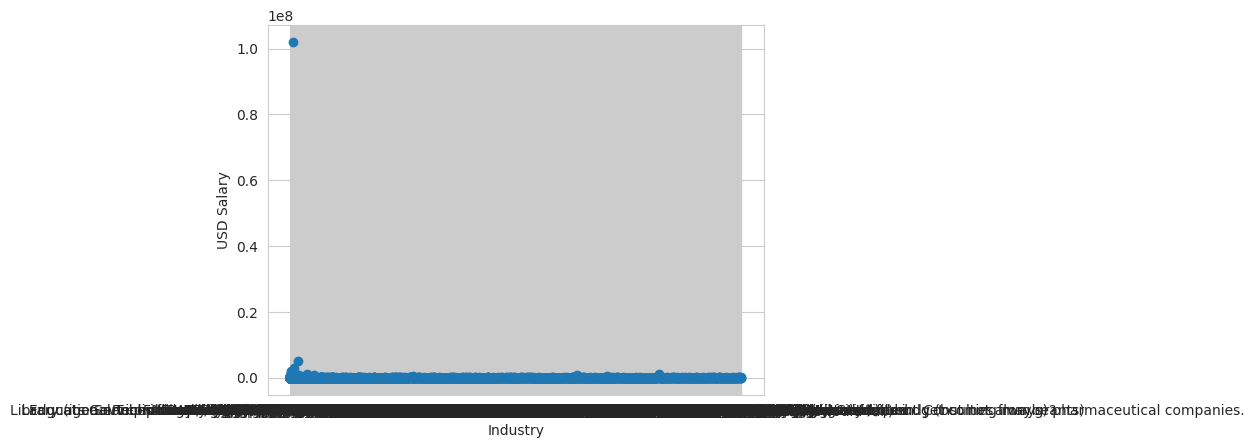

In [107]:
plt.scatter(df['industry'], df['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
plt.show()

### Industri dengan Gaji Terbesar berdasarkan nilai max adalah Industri Utilities & Telecommunications dengan gaji 102.000.000 USD

#### NB: Untuk melihat industri dengan gaji terbesar, sebaiknya menggunakan nilai mean (rata-rata) daripada nilai max (nilai maksimum). Hal ini dikarenakan nilai max dapat dipengaruhi oleh outlier atau nilai ekstrim yang tidak merepresentasikan data secara keseluruhan. Sedangkan nilai mean lebih mewakili nilai tengah atau pusat dari data dan tidak terlalu dipengaruhi oleh nilai ekstrim.

In [94]:
industry_salary = df[['industry', 'usd_salary']]
industry_salary_max = industry_salary.groupby(['industry'])['usd_salary'].max().reset_index()
industry_salary_max = industry_salary_max.sort_values(by=['usd_salary'], ascending=False)
industry_salary_max = industry_salary_max.reset_index(drop=True)
industry_salary_max

,industry,usd_salary
0,Utilities & Telecommunications,102000000
1,Sales,5000044
2,Art & Design,3000000
3,Computing or Tech,2111538
4,Health care,1900000
...,...,...
1204,Customer service,55
1205,Museum (University Affiliated),40
1206,Homemaker,0
1207,Stay-at-home parent,0


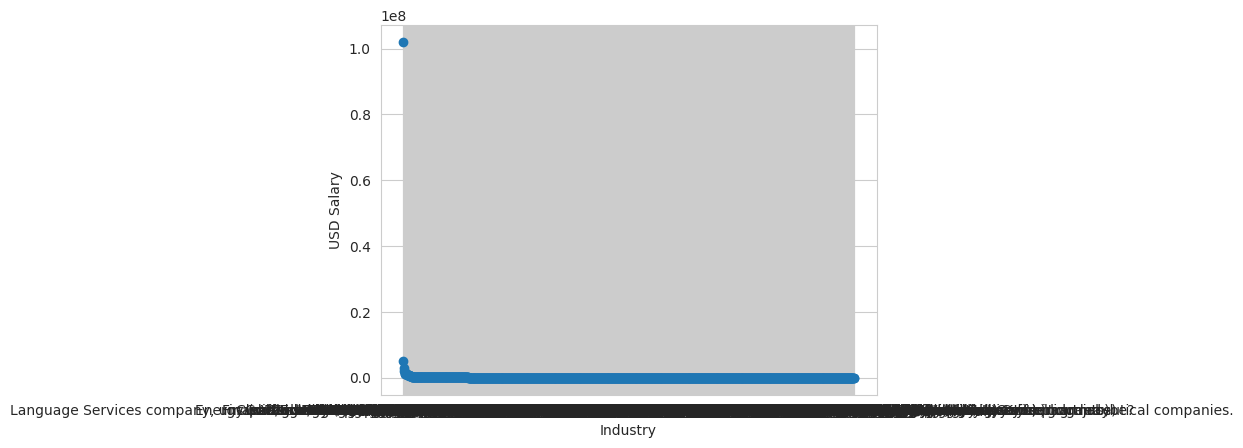

In [108]:
plt.scatter(industry_salary_max['industry'], industry_salary_max['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
plt.show()

###**Industri dengan Gaji Terbesar berdasarkan rata-rata adalah Ipr dengan gaji 1.111.111 USD**

In [93]:
industry_salary_mean = industry_salary.groupby(['industry'])['usd_salary'].mean().reset_index()
convert_dict = {'industry': object,
                'usd_salary': int
                }
industry_salary_mean = industry_salary_mean.astype(convert_dict)
industry_salary_mean = industry_salary_mean.sort_values(by=['usd_salary'], ascending=False)
industry_salary_mean = industry_salary_mean.reset_index(drop=True)
industry_salary_mean

,industry,usd_salary
0,Ipr,1111111
1,Oil,850617
2,Commercial Building Material Distribution,400000
3,Utilities & Telecommunications,368025
4,Sports,300000
...,...,...
1204,Customer service,55
1205,Museum (University Affiliated),40
1206,student,0
1207,Stay-at-home parent,0


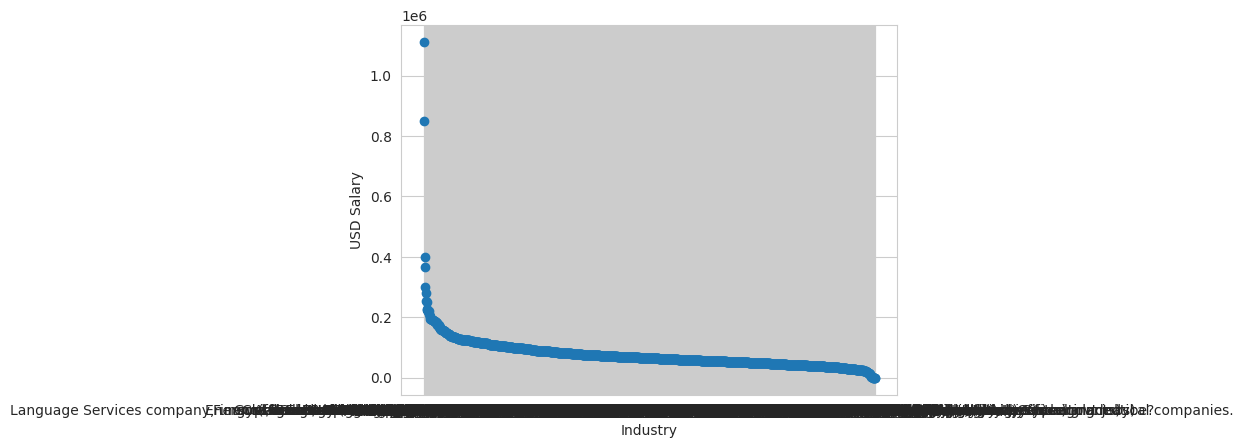

In [109]:
plt.scatter(industry_salary_mean['industry'], industry_salary_mean['usd_salary'])
plt.xlabel('Industry')
plt.ylabel('USD Salary')
plt.show()

#Visualisasi

##Hubungan Gaji Terhadap Pengalaman Kerja

Text(0.5, 0, 'Tahun Pengalaman Kerja')

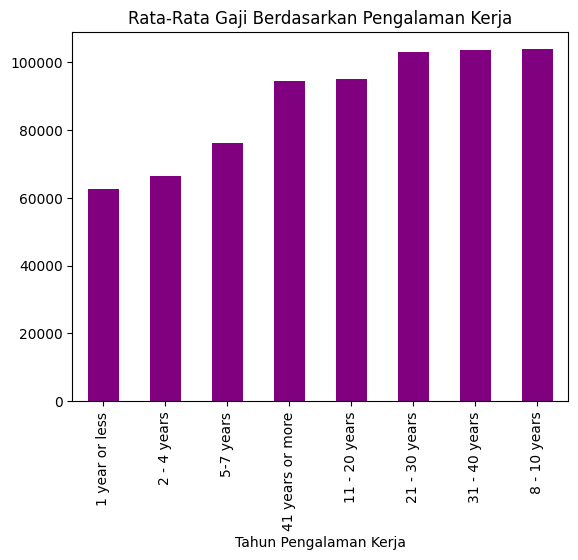

In [87]:
mean_salary_by_year = df.groupby('work_experience_overall')['usd_salary'].mean()
mean_salary_by_year = mean_salary_by_year.sort_values()
mean_salary_by_year.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja')
plt.xlabel('Tahun Pengalaman Kerja')

Text(0.5, 0, 'Tahun Pengalaman Kerja')

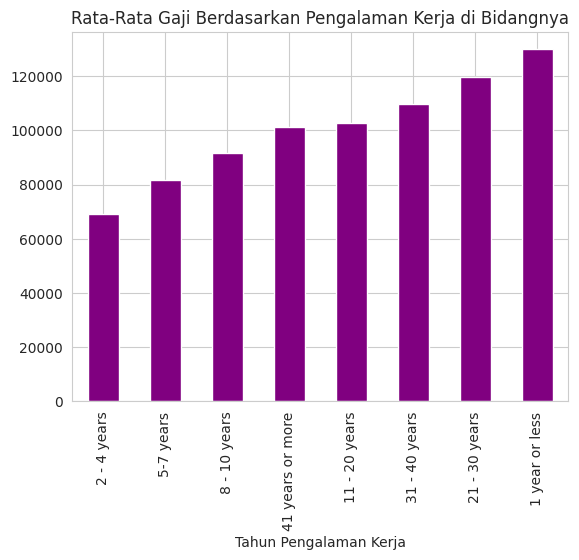

In [112]:
mean_salary_by_year = df.groupby('work_experience_professional')['usd_salary'].mean()
mean_salary_by_year = mean_salary_by_year.sort_values()
mean_salary_by_year.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Pengalaman Kerja di Bidangnya')
plt.xlabel('Tahun Pengalaman Kerja')

##Hubungan Jenis Kelamin Terhadap Gaji

Text(0.5, 0, 'Jenis Kelamin')

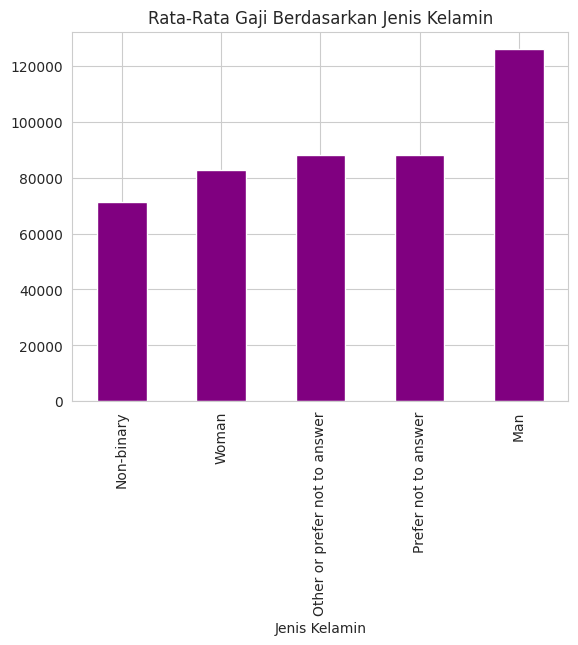

In [114]:
mean_salary_by_gender = df.groupby('gender')['usd_salary'].mean()
mean_salary_by_gender = mean_salary_by_gender.sort_values()
mean_salary_by_gender.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')

##Hubungan Tingkat Pendidikan Terhadap Gaji

Text(0.5, 0, 'Tingkat Pendidikan')

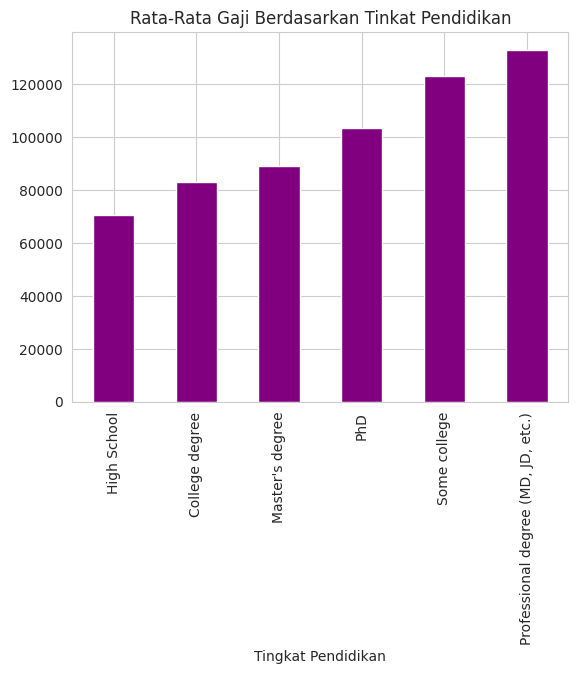

In [115]:
mean_salary_by_education = df.groupby('education')['usd_salary'].mean()
mean_salary_by_education = mean_salary_by_education.sort_values()
mean_salary_by_education.plot(kind='bar', color='purple')

# Menambah label dan judul
plt.title('Rata-Rata Gaji Berdasarkan Tinkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')